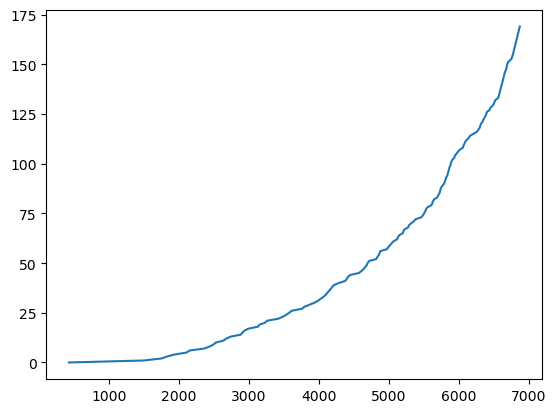

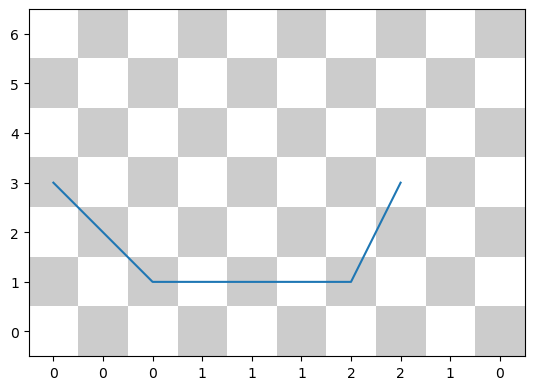

In [41]:
import numpy as np
import matplotlib.pyplot as plt

class WindyGridWorld:
    def __init__(self) -> None:
        self.width = 10
        self.height = 7
        self.start = (0,3)
        self.end = (7,3)
        self.wins = (0,0,0,1,1,1,2,2,1,0)
        self.pos = list(self.start)

    def state_space(self):
        return (self.width, self.height)
    
    def action_space(self):
        return 4
    
    def reset(self):
        self.pos = list(self.start)
        return tuple(self.pos)

    def step(self, action):
        #print("begin step:", self.pos, action)
        win = self.wins[self.pos[0]]
        match action:
            case 0:#left
                self.pos[0] = max(self.pos[0]-1, 0)
            case 1:#right
                self.pos[0] = min(self.pos[0]+1, self.width-1)
            case 2:#down
                self.pos[1] = max(self.pos[1]-1, 0)
            case 3:#up
                self.pos[1] = min(self.pos[1]+1, self.height-1)
        self.pos[1] = min(self.pos[1] + win, self.height-1)
        #print("end step:", action, self.pos)
        terminated = self.pos == list(self.end)
        return terminated, tuple(self.pos), -1
    

class WindyGridWorld2:
    def __init__(self, stayable) -> None:
        self.width = 10
        self.height = 7
        self.start = (0,3)
        self.end = (7,3)
        self.wins = (0,0,0,1,1,1,2,2,1,0)
        self.pos = list(self.start)
        self.stayable = stayable

    def state_space(self):
        return (self.width, self.height)
    
    def action_space(self):
        return 9 if self.stayable else 8
    
    def reset(self):
        self.pos = list(self.start)
        return tuple(self.pos)

    def step(self, action):
        #print("begin step:", self.pos, action)
        win = self.wins[self.pos[0]]
        match action % 3:
            case 0:#left
                self.pos[0] = max(self.pos[0]-1, 0)
            case 1:#right
                self.pos[0] = min(self.pos[0]+1, self.width-1)

        match action // 3:
            case 0:#down
                self.pos[1] = max(self.pos[1]-1, 0)
            case 1:#up
                self.pos[1] = min(self.pos[1]+1, self.height-1)
            
        self.pos[1] = min(self.pos[1] + win, self.height-1)
        #print("end step:", action, self.pos)
        terminated = self.pos == list(self.end)
        return terminated, tuple(self.pos), -1



def sarsa(env, num_episodes, alpha, epsilon = 0.01, gamma = 1.0):
    state_shape = env.state_space()
    action_shape = env.action_space()
    q_shape = state_shape + (action_shape,)
    qs = np.zeros(q_shape)
    steps_stat=[]
    num_steps = 0
    for episode in range(num_episodes):
        state = env.reset()
        if np.random.random() < epsilon:
            action = np.random.choice(action_shape)
        else:
            action = qs[state].argmax()
        while True:
            num_steps += 1
            terminated, next_state, reward = env.step(action)
            if terminated:
                q_prime = 0
            else:
                if np.random.random() < epsilon:
                    next_action = np.random.choice(action_shape)
                else:
                    next_action = qs[next_state].argmax()
                q_prime = qs[next_state][next_action]
            qs[state][action] += (reward + q_prime*gamma - qs[state][action])*alpha
            state = next_state
            action = next_action
            if terminated:
                break
        steps_stat.append(num_steps)
    return qs.argmax(2), steps_stat



#env = WindyGridWorld()
#env = WindyGridWorld2(False)
env = WindyGridWorld2(True)

policy, steps_stat = sarsa(env, 170, 0.5)
plt.plot(steps_stat,range(len(steps_stat)))
plt.show()

state = env.reset()
action = policy[state]
poses = [(state,action)]
max_step = 20
for n in range(max_step):
    terminated, next_state, reward = env.step(action)
    next_action = policy[next_state]
    state = next_state
    action = next_action
    poses.append((state,action))
    if terminated:
        break

width,height = env.state_space()
board = np.ones((height, width, 3))
board[1::2, ::2] = 0.8
board[::2, 1::2] = 0.8
plt.imshow(board,origin='lower')
x = [pos[0][0] for pos in poses]
y = [pos[0][1] for pos in poses]
plt.plot(x, y)
plt.xticks(range(width),labels=env.wins);


(0, 3)